#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px

#### Pandas Datetime Index

In [2]:
pd.date_range('2020-01-01', periods=15, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.date_range('Jan 01, 2020', periods=15, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.to_datetime(['10/01/2020', '10/02/2020'], format='%d/%m/%Y')

DatetimeIndex(['2020-01-10', '2020-02-10'], dtype='datetime64[ns]', freq=None)

In [7]:
arr_1 = np.random.randint(10, 50, size=(3,3))
date_arr = pd.date_range('2020-02-01', periods=3, freq='D')
df_1 = pd.DataFrame(arr_1, columns=['A','B','C'], index=date_arr)
df_1

,A,B,C
2020-02-01,46,28,11
2020-02-02,26,48,41
2020-02-03,11,17,26


In [8]:
df_1.index.min()

Timestamp('2020-02-01 00:00:00')

In [9]:
df_1.index.max()

Timestamp('2020-02-03 00:00:00')

In [10]:

df_1.index.argmin()

0

In [11]:
df_1.index.argmax()

2

#### Time Resampling

In [17]:
df_apple = pd.read_csv('../datasets/appl.csv')
df_apple.head()

,AAPL_x,AAPL_y
0,2014-01-02,77.445395
1,2014-01-03,77.045575
2,2014-01-06,74.896972
3,2014-01-07,75.856461
4,2014-01-08,75.091947


In [18]:
px.line(df_apple, x='AAPL_x', y='AAPL_y',
        labels={'x':'Date', 'y':'Price'})

In [19]:
df_apple = pd.read_csv('../datasets/appl.csv', index_col='AAPL_x', parse_dates=True)

df_apple

,AAPL_y
AAPL_x,
2014-01-02,77.445395
2014-01-03,77.045575
2014-01-06,74.896972
2014-01-07,75.856461
2014-01-08,75.091947
...,...
2014-12-08,113.653345
2014-12-09,109.755497
2014-12-10,113.960331


In [20]:
arr_2 = np.random.randint(86000000, 256000000, size=240)
df_apple['Volume'] = arr_2
df_apple.rename(columns={'AAPL_y':'Price'}, inplace=True)
df_apple

,Price,Volume
AAPL_x,,
2014-01-02,77.445395,138003924
2014-01-03,77.045575,255065761
2014-01-06,74.896972,129341103
2014-01-07,75.856461,105935811
2014-01-08,75.091947,105442871
...,...,...
2014-12-08,113.653345,206950914
2014-12-09,109.755497,92735488
2014-12-10,113.960331,233421107


In [30]:
df_apple.resample(rule='D').mean()

,Price,Volume
AAPL_x,,
2014-01-02,77.445395,138003924.0
2014-01-03,77.045575,255065761.0
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,74.896972,129341103.0
...,...,...
2014-12-08,113.653345,206950914.0
2014-12-09,109.755497,92735488.0
2014-12-10,113.960331,233421107.0


In [29]:
df_apple.resample(rule='D').max()

,Price,Volume
AAPL_x,,
2014-01-02,77.445395,138003924.0
2014-01-03,77.045575,255065761.0
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,74.896972,129341103.0
...,...,...
2014-12-08,113.653345,206950914.0
2014-12-09,109.755497,92735488.0
2014-12-10,113.960331,233421107.0


In [28]:
df_apple['Price'].resample(rule='D').std()

AAPL_x
2014-01-02   NaN
2014-01-03   NaN
2014-01-04   NaN
2014-01-05   NaN
2014-01-06   NaN
              ..
2014-12-08   NaN
2014-12-09   NaN
2014-12-10   NaN
2014-12-11   NaN
2014-12-12   NaN
Freq: D, Name: Price, Length: 345, dtype: float64

In [25]:
df_apple['Price'].resample(rule='W').mean()

AAPL_x
2014-01-05     77.245485
2014-01-12     75.455639
2014-01-19     76.038439
2014-01-26     76.503959
2014-02-02     71.368076
2014-02-09     71.149044
2014-02-16     74.678656
2014-02-23     75.587793
2014-03-02     73.529769
2014-03-09     74.284628
2014-03-16     74.712755
2014-03-23     74.239750
2014-03-30     75.842265
2014-04-06     75.722917
2014-04-13     73.618080
2014-04-20     72.909402
2014-04-27     76.138906
2014-05-04     82.533924
2014-05-11     83.176830
2014-05-18     83.326601
2014-05-25     85.153502
2014-06-01     88.384819
2014-06-08     90.113274
2014-06-15     92.331647
2014-06-22     90.837377
2014-06-29     89.502312
2014-07-06     92.062628
2014-07-13     93.747261
2014-07-20     94.398938
2014-07-27     94.538140
2014-08-03     96.249009
2014-08-10     94.067913
2014-08-17     95.743275
2014-08-24     99.016876
2014-08-31    100.899035
2014-09-07    100.123321
2014-09-14     98.781977
2014-09-21    100.781889
2014-09-28     99.890734
2014-10-05     98.

In [27]:
df_apple['Price'].resample(rule='ME').mean()

AAPL_x
2014-01-31     74.991313
2014-02-28     73.638869
2014-03-31     74.809337
2014-04-30     75.717543
2014-05-31     84.660152
2014-06-30     90.705426
2014-07-31     94.471375
2014-08-31     97.251982
2014-09-30     99.789893
2014-10-31    100.803969
2014-11-30    112.390996
2014-12-31    113.675935
Freq: ME, Name: Price, dtype: float64

In [32]:
df_apple['Price'].resample(rule='SME').std()

AAPL_x
2013-12-31    1.130276
2014-01-15    3.020188
2014-01-31    2.391701
2014-02-15    1.434622
2014-02-28    0.543056
2014-03-15    0.937439
2014-03-31    1.224844
2014-04-15    3.893077
2014-04-30    0.520959
2014-05-15    2.146047
2014-05-31    1.592732
2014-06-15    0.794257
2014-06-30    1.274297
2014-07-15    1.665842
2014-07-31    1.017027
2014-08-15    1.458338
2014-08-31    1.865898
2014-09-15    1.445872
2014-09-30    0.889323
2014-10-15    3.922422
2014-10-31    1.679346
2014-11-15    2.010719
2014-11-30    2.649443
Freq: SME-15, Name: Price, dtype: float64

In [34]:
df_apple['Price'].resample(rule='QE').std()

AAPL_x
2014-03-31    2.015981
2014-06-30    6.644557
2014-09-30    3.036962
2014-12-31    6.959381
Freq: QE-DEC, Name: Price, dtype: float64

<Axes: xlabel='AAPL_x'>

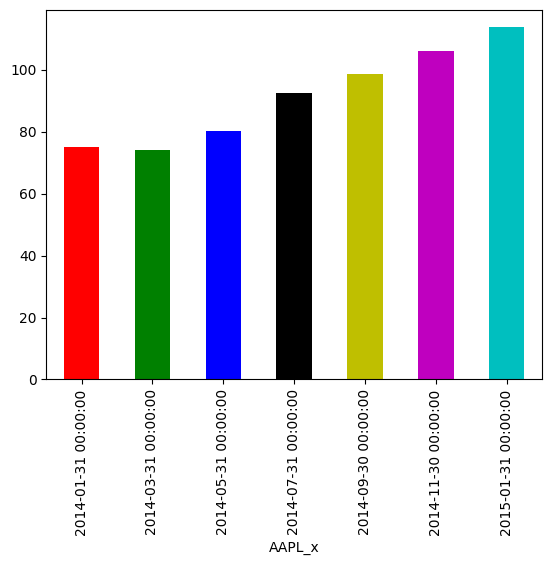

In [35]:
df_apple['Price'].resample(rule='2ME').mean().plot.bar(color=list('rgbkymc'))

#### Moving Average

<Axes: xlabel='AAPL_x'>

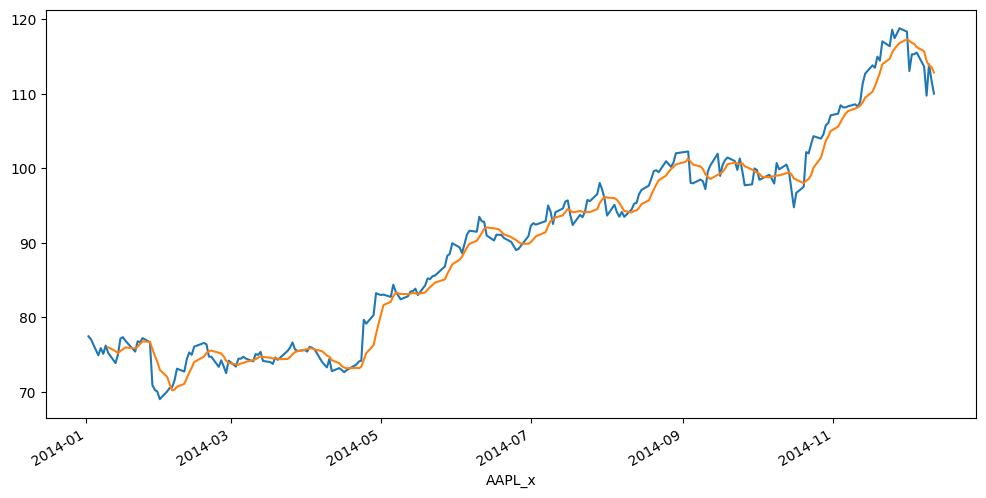

In [38]:
df_apple['Price'].plot(figsize=(12,6))
df_apple.rolling(window=7).mean()['Price'].plot()

<Axes: xlabel='AAPL_x'>

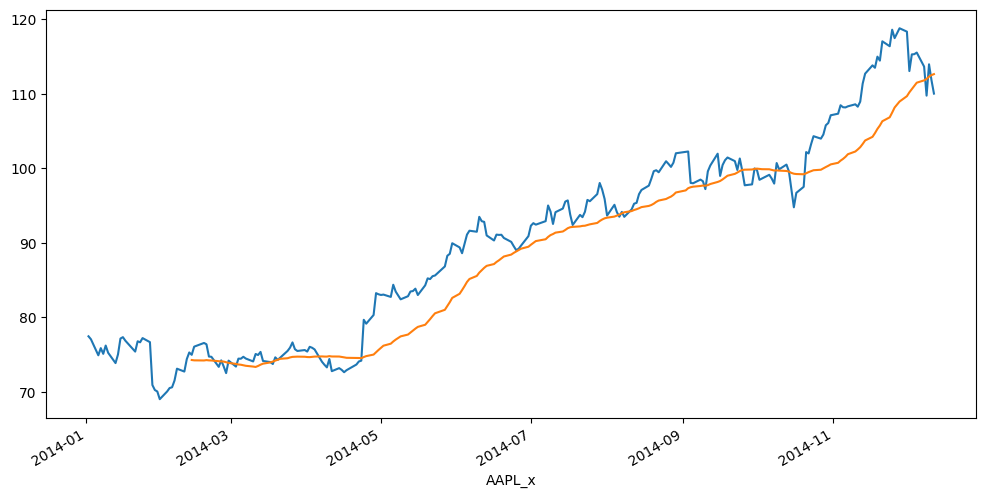

In [39]:
df_apple['Price'].plot(figsize=(12,6))
# 30 moving average
df_apple.rolling(window=30).mean()['Price'].plot()

<Axes: xlabel='AAPL_x'>

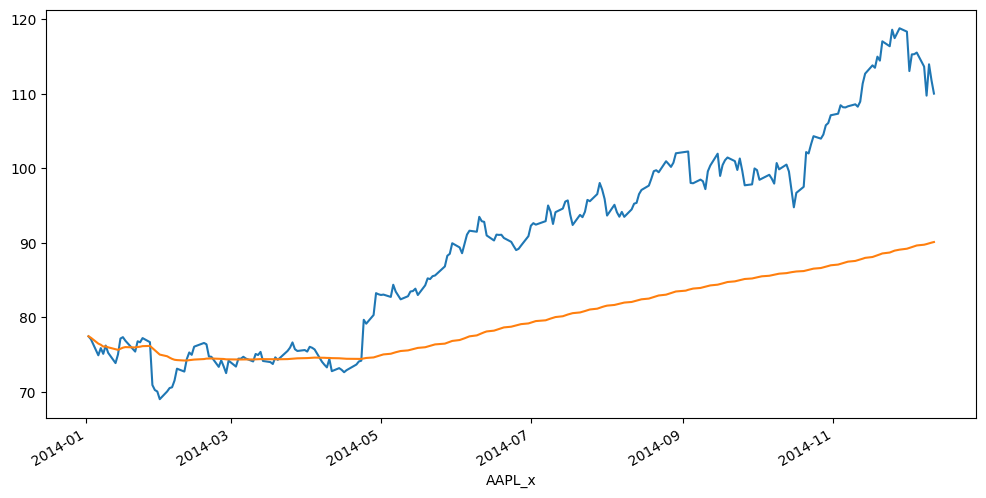

In [40]:
df_apple['Price'].plot(figsize=(12,6))
df_apple['Price'].expanding().mean().plot(figsize=(12,6))

#### Shifting Time Data

In [41]:
df_apple.shift(-1)

,Price,Volume
AAPL_x,,
2014-01-02,77.045575,255065761.0
2014-01-03,74.896972,129341103.0
2014-01-06,75.856461,105935811.0
2014-01-07,75.091947,105442871.0
2014-01-08,76.202632,158697492.0
...,...,...
2014-12-08,109.755497,92735488.0
2014-12-09,113.960331,233421107.0
2014-12-10,111.817477,202704654.0
